In [13]:
# 패키지 임포트
import pandas
import numpy
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler # 스케일링 관련 패키지
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # 범주화 및 더미변수화
import warnings 

warnings.filterwarnings(action="ignore")
# 데이터 경로
PATH = "C:/Users/WAI/OneDrive/03.WORKSPACE/00.DATA/99.KAGGLE/insurance/"

# 데이터 명
DATA_NAME = "14. Learning from Imbalaced Insurance Data/aug_train_mod_2.csv"

In [14]:
# 실습 데이터 불러오기
df = pandas.read_csv(PATH + DATA_NAME)
print(df)

            id  Gender        Age  Driving_License  Region_Code  \
0        17163       0  42.000000              1.0         28.0   
1        32023       1  66.000000              1.0         33.0   
2        71711       0  51.000000              1.0          8.0   
3       331781       0  38.000000              1.0         28.0   
4       290704       1  45.000000              1.0         28.0   
...        ...     ...        ...              ...          ...   
177350  447797       0  38.535247              1.0         28.0   
177351  157507       0  56.000000              1.0         17.0   
177352  498091       1  48.000000              1.0         28.0   
177353   89317       0  47.000000              1.0         43.0   
177354  165293       0  45.000000              1.0         28.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0    1-2 Year            Yes    32901.909565   
1                        0    1-2 Year           

In [15]:
### 'Age' 나이 변수 범주화 및 더미변수화 ###
### 실습 1) 'Age' 나이 변수 범주화 하기

# 나이대 라벨링 리스트 선언
labels = []
# 구간 개수 : 9
diff_n = 9
for x in range(10, diff_n*10+10, 10):
    print(x)
    labels.append(str(x) + '대')
print(labels) # 구간 개수에 따라 나이대를 라벨링

# 데이터 프레임에 'Age_grade'  나이대 그룹핑(10개의 구간을 일정한 구간의 크기로 구분함)
df['Age_grade'] = pandas.cut(df.loc[:,'Age'], bins=diff_n, labels=labels)
print(df['Age_grade'] )

# 데이터 프레임에 'Age_grade_quantile' 나이대 그룹핑(9개의 구간을 일정한 분위수로 구분함)
# 변수의 변량에 따라서 분위수를 나누는 구간이 중복가능하기 때문에 duplicates 옵션에 'drop'을 해준다.
# labels=False 옵션을 주어 낮은 구간부터 높은 구간순으로 0,1,..6  +1씩 값이 증가하는 구간으로 세팅된다.
df['Age_grade_quantile'] = pandas.qcut(df.loc[:,'Age'], q=diff_n, duplicates='drop', labels=False) # 7개의 구간으로 나누어졌다.
# 0 등급부터 라벨링이 되기때문에 'v1_grade_quantile' 컬럼에 전체 적으로 +1을 해준다.
df['Age_grade_quantile'] = df['Age_grade_quantile'] + 1
print(df['Age_grade_quantile'])


10
20
30
40
50
60
70
80
90
['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대']
0         40대
1         70대
2         50대
3         30대
4         40대
         ... 
177350    30대
177351    50대
177352    40대
177353    40대
177354    40대
Name: Age_grade, Length: 177355, dtype: category
Categories (9, object): ['10대' < '20대' < '30대' < '40대' ... '60대' < '70대' < '80대' < '90대']
0         3
1         8
2         6
3         2
4         4
         ..
177350    2
177351    7
177352    5
177353    5
177354    4
Name: Age_grade_quantile, Length: 177355, dtype: int64


In [16]:
### 실습 2) 'Age_grade'(범주형 변수) 더미 변수화 하기
# unique 값 확인 ['10대', '30대', '40대', '50대', '70대', '20대', '60대', '80대', '90대']
print(df.loc[:,'Age_grade'].unique())

# 범주형 데이터는 모델의 학습 변수로 사용할 수 없다. 그래서 더미 변수화를 해주여야 사용할 수 있게 된다.
dummies_df = pandas.get_dummies(df.loc[:,'Age_grade']) # 더미 변수를 생성
# 더미 변수명 변경 => 'Age_1' ~ 'Age_9' 까지
dummies_df.columns = list(map(lambda x : 'Age_' + x.replace('0대',''), list(dummies_df.columns)))
result_df = pandas.concat([df, dummies_df], axis=1) # 생성된 더미 변수를 원 데이터 옆에 붙여준다.
print(result_df) # 원 데이터 뒤에 프레임 뒤에 더미 변수가 생성된 것을 확인

['40대', '70대', '50대', '30대', '20대', '10대', '60대', '80대', '90대']
Categories (9, object): ['10대' < '20대' < '30대' < '40대' ... '60대' < '70대' < '80대' < '90대']
            id  Gender        Age  Driving_License  Region_Code  \
0        17163       0  42.000000              1.0         28.0   
1        32023       1  66.000000              1.0         33.0   
2        71711       0  51.000000              1.0          8.0   
3       331781       0  38.000000              1.0         28.0   
4       290704       1  45.000000              1.0         28.0   
...        ...     ...        ...              ...          ...   
177350  447797       0  38.535247              1.0         28.0   
177351  157507       0  56.000000              1.0         17.0   
177352  498091       1  48.000000              1.0         28.0   
177353   89317       0  47.000000              1.0         43.0   
177354  165293       0  45.000000              1.0         28.0   

        Previously_Insured Vehicle_Age Ve

In [17]:
### 실습 3) sklearn의 LabelEncoder, OneHotEncoder 함수로 더미 변수화 하기
le = LabelEncoder()
labels = le.fit_transform(df.loc[:,'Age_grade']) # 데이터 변량에 따른 라벨링
lb_matrix = labels.reshape(-1, 1) # 2차원 행렬로 변환
print('나이대 데이터 행렬 :', lb_matrix)
print('나이대 데이터 행렬 사이즈 :', lb_matrix.shape)
print('나이대 데이터 변량 unique :', le.classes_)

# 원핫인코더로 더미 변수 생성
ohe = OneHotEncoder(sparse=False)
ohe_matrix = ohe.fit_transform(lb_matrix)
list(le.classes_)
# 행렬을 변수화
dummies_df_2 = pandas.DataFrame(data=ohe_matrix, columns=le.classes_) # 데이터 프레임화
# 더미 변수명 변경 => 'Age_1' ~ 'Age_9' 까지
dummies_df_2.columns = list(map(lambda x : 'Age_' + x.replace('0대',''), list(dummies_df_2.columns)))
result_df = pandas.concat([df, dummies_df_2], axis=1) # 생성된 더미 변수를 원 데이터 옆에 붙여준다.
print(result_df)

나이대 데이터 행렬 : [[3]
 [6]
 [4]
 ...
 [3]
 [3]
 [3]]
나이대 데이터 행렬 사이즈 : (177355, 1)
나이대 데이터 변량 unique : ['10대' '20대' '30대' '40대' '50대' '60대' '70대' '80대' '90대']
            id  Gender        Age  Driving_License  Region_Code  \
0        17163       0  42.000000              1.0         28.0   
1        32023       1  66.000000              1.0         33.0   
2        71711       0  51.000000              1.0          8.0   
3       331781       0  38.000000              1.0         28.0   
4       290704       1  45.000000              1.0         28.0   
...        ...     ...        ...              ...          ...   
177350  447797       0  38.535247              1.0         28.0   
177351  157507       0  56.000000              1.0         17.0   
177352  498091       1  48.000000              1.0         28.0   
177353   89317       0  47.000000              1.0         43.0   
177354  165293       0  45.000000              1.0         28.0   

        Previously_Insured Vehicle_Age Ve

Annual_Premium 데이터 :  0         32901.909565
1         35841.000000
2          2630.000000
3          2630.000000
4         32901.909565
              ...     
177350    37138.000000
177351    32901.909565
177352    32901.909565
177353    32774.000000
177354    40443.000000
Name: Annual_Premium, Length: 177355, dtype: float64
최소 : 2630.0 , 최대 : 42359.0


Text(0.5, 1.0, 'Annual_Premium RAW DATA')

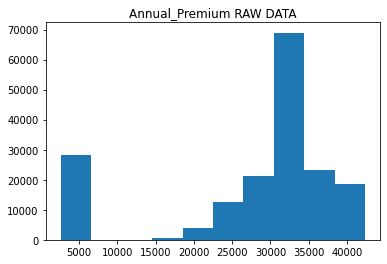

In [18]:
##'Annual_Premium' 변수 Scaling 하기 ###

# 'Annual_Premium' 데이터 최대 및 최소값 확인
print('Annual_Premium 데이터 : ', df.loc[:,'Annual_Premium'])
var_array = numpy.array(df.loc[:,'Annual_Premium'])

# 히스토그램 : X축은 변량, Y축은 빈도수
print('최소 :', var_array.min(), ', 최대 :', var_array.max())
plt.hist(var_array)
plt.title('Annual_Premium RAW DATA')

스케일러 객체 : StandardScaler()
[[32901.90956485]
 [35841.        ]
 [ 2630.        ]
 ...
 [32901.90956485]
 [32774.        ]
 [40443.        ]]
StandardScaling :  [[ 0.42812675]
 [ 0.67759603]
 [-2.14134554]
 ...
 [ 0.42812675]
 [ 0.41726982]
 [ 1.06821266]]
최소 : -2.141345542109037 , 최대 : 1.2308422746543195


Text(0.5, 1.0, 'Annual_Premium Standard Scaling')

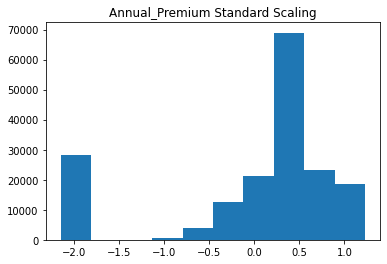

In [19]:
### 실습 4) StandardScaler : 평균을 0, 분산 1인 데이터로 변경합니다.

standardscaler = StandardScaler() # 스케일러 객체 할당
print('스케일러 객체 :', standardscaler) 

# 스케일링을 하기위해 2차원 행렬로 변환
scale_array = var_array.reshape(-1,1)
print(scale_array)
# StandardScaler 스케일링
std_scaling = standardscaler.fit_transform(scale_array)
print('StandardScaling : ', std_scaling)

# 히스토그램 : Standard Scalling
print('최소 :', std_scaling.min(), ', 최대 :', std_scaling.max())
plt.hist(std_scaling)
plt.title('Annual_Premium Standard Scaling')

MinMaxScaler()
MinMaxScaling :  [[0.76196002]
 [0.83593848]
 [0.        ]
 ...
 [0.76196002]
 [0.75874047]
 [0.95177326]]
최소 : 0.0 , 최대 : 1.0


Text(0.5, 1.0, 'Annual_Premium MinMax Scaling')

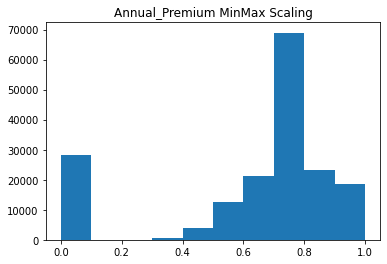

In [20]:
### 실습 5) MinmaxScaler : 모든 데이터 값이 0과 1사이의 값들로 매핑됩니다.
minmaxscaler= MinMaxScaler()
print(minmaxscaler) # 스케일러 객체

# StandardScaler 스케일링
mms_scaling = minmaxscaler.fit_transform(scale_array)
print('MinMaxScaling : ', mms_scaling)

# 히스토그램 : MinMax Scalling
print('최소 :', mms_scaling.min(), ', 최대 :', mms_scaling.max())
plt.hist(mms_scaling)
plt.title('Annual_Premium MinMax Scaling')

MinMaxScaler()
MaxAbsScaling :  [[0.76196002]
 [0.83593848]
 [0.        ]
 ...
 [0.76196002]
 [0.75874047]
 [0.95177326]]
최소 : 0.0 , 최대 : 1.0


Text(0.5, 1.0, 'Annual_Premium MaxAbsScaling Scaling')

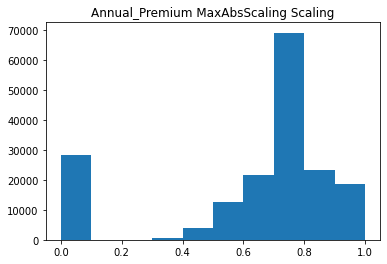

In [12]:
### 실습 6) MaxAbsScaler : 절대값이 0~1사이에 매핑되도록 합니다. 즉 -1~1 사이로 재조정됩니다..
minabsscaler= MaxAbsScaler()
print(minmaxscaler) # 스케일러 객체

# MaxAbsScaler 스케일링
mabs = minabsscaler.fit_transform(scale_array)
print('MaxAbsScaling : ', mms_scaling)
print('최소 :', mms_scaling.min(), ', 최대 :', mms_scaling.max())
# 히스토그램으로 표현(스케일링한 데이터 분포) => 모든 데이터 값이 양수이기 때문에 스케일링된 값이 음수일 수가 없습니다.
plt.hist(mms_scaling)
plt.title('Annual_Premium MaxAbsScaling Scaling')